# Household Power Consumption Prediction

- *Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 5 years. Different electrical quantities and some sub-metering values are available.*

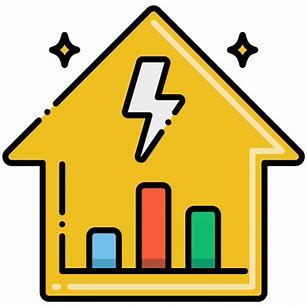

## Objective: Building a Machine Learning Regression Model
The primary objective is to build a robust and accurate machine learning regression model that can predict future household power consumption based on historical data. This involves:

Data Preprocessing: Cleaning and transforming the data, handling missing values, and potentially engineering new features (e.g., time-based features like hour of day, day of week). Feature Selection: Identifying the most relevant features for predicting power consumption. This may involve analyzing correlations between variables and using feature importance techniques. Model Selection: Choosing an appropriate regression model (e.g., linear regression, polynomial regression, support vector regression, random forest, gradient boosting) based on the characteristics of the data and the desired level of accuracy. Model Training and Evaluation: Training the selected model on a portion of the data and evaluating its performance on a held-out test set using appropriate metrics (e.g., Mean Squared Error, Root Mean Squared Error, R-squared). Model Optimization: Tuning the model's hyperparameters to improve its predictive accuracy and generalization performance.

## Problem Statement
As someone keen on energy efficiency, I recognized a challenge that many households face: optimizing power usage. A lack of insights into energy consumption patterns often leads to wastage and higher costs. Through this project, I set out to explore and answer key questions such as:

- *Consumption Patterns: How does power consumption vary across different timeframes (e.g., daily, weekly)?*
- *Peak Usage Periods: When is the household’s energy usage at its highest?*
- *Correlations: Are there any significant relationships between power consumption and other factors?*
- *Actionable Insights: What can households do to enhance energy efficiency?*

###  Project Overview:

1-Summary of Project

2-Importing Required Libraries

3-Exploratory Data Analysis

4- Data Visualization

5- Train and Test Split

6- Data Preprocessing

7- Machine Learning Algorithms Used

8-Data Visualization After Model Evaluation

9-Findings From Model Evaluation

10-Conclusion

### To predict:- Total Power Use

## Importing Required Libraries

In [2]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Reading Our Data

In [3]:

df=pd.read_csv('household_power_consumption.txt', sep=";")
df.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

## EDA

In [4]:
# due to computation power taking sample of 100000 data points
df = df.sample(100000)
df.head()

Date      Time Global_active_power Global_reactive_power  \
1679622   25/2/2010  03:06:00               0.250                 0.000   
1179475   14/3/2009  19:19:00               2.424                 0.198   
890474    26/8/2008  02:38:00               0.160                 0.138   
437614   16/10/2007  14:58:00               3.720                 0.420   
1859963   30/6/2010  08:47:00               1.368                 0.194   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
1679622  244.030            1.000          0.000          0.000   
1179475  238.000           10.200          0.000          1.000   
890474   239.840            0.800          0.000          1.000   
437614   236.970           15.800          0.000         37.000   
1859963  238.460            5.800          0.000          1.000   

         Sub_metering_3  
1679622             0.0  
1179475            18.0  
890474              0.0  
437614             17.0  
1859963            18.0

In [5]:
# shape
df.shape

(100000, 9)

In [6]:
# info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1679622 to 1236093
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    100000 non-null  object 
 3   Global_reactive_power  100000 non-null  object 
 4   Voltage                100000 non-null  object 
 5   Global_intensity       100000 non-null  object 
 6   Sub_metering_1         100000 non-null  object 
 7   Sub_metering_2         100000 non-null  object 
 8   Sub_metering_3         98755 non-null   float64
dtypes: float64(1), object(8)
memory usage: 7.6+ MB


In [7]:
# column names
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [8]:
# special characters in variables

for feature in [feature for feature in df.columns if feature not in ['Date', 'Time']]:
    print("The feature {} has {} ? in it".format(feature,df[df[feature]=='?'].shape))


The feature Global_active_power has (1245, 9) ? in it
The feature Global_reactive_power has (1245, 9) ? in it
The feature Voltage has (1245, 9) ? in it
The feature Global_intensity has (1245, 9) ? in it
The feature Sub_metering_1 has (1245, 9) ? in it
The feature Sub_metering_2 has (1245, 9) ? in it
The feature Sub_metering_3 has (0, 9) ? in it


In [9]:
### replacing ? values with nan values
df.replace('?', np.nan, inplace=True)

In [10]:
### checking no of records in each feature that have value as ? after replacing them
for feature in [feature for feature in df.columns if feature not in ['Date', 'Time']]:
    print("The feature {} has {} ? in it".format(feature,df[df[feature]=='?'].shape))

The feature Global_active_power has (0, 9) ? in it
The feature Global_reactive_power has (0, 9) ? in it
The feature Voltage has (0, 9) ? in it
The feature Global_intensity has (0, 9) ? in it
The feature Sub_metering_1 has (0, 9) ? in it
The feature Sub_metering_2 has (0, 9) ? in it
The feature Sub_metering_3 has (0, 9) ? in it


In [11]:
### converting datatype of Date feature to datetime
df['Date']=pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [12]:

### seperating day and month, creating new feature for day and month
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [13]:
### dropping Time this is not important and Date is already used in day and month
df.drop('Time', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)

In [14]:
### stripping . and zero from below mentioned features so it can be converted to integer
### converting to str datatype so replace function can be used.
'''
df['Sub_metering_3']= df['Sub_metering_3'].astype(str)
df['Sub_metering_1']= df['Sub_metering_1'].str.split(".", expand=True)[0]
df['Sub_metering_2']= df['Sub_metering_2'].str.split(".", expand=True)[0]
df['Sub_metering_3']= df['Sub_metering_3'].str.split(".", expand=True)[0]
'''

'\ndf[\'Sub_metering_3\']= df[\'Sub_metering_3\'].astype(str)\ndf[\'Sub_metering_1\']= df[\'Sub_metering_1\'].str.split(".", expand=True)[0]\ndf[\'Sub_metering_2\']= df[\'Sub_metering_2\'].str.split(".", expand=True)[0]\ndf[\'Sub_metering_3\']= df[\'Sub_metering_3\'].str.split(".", expand=True)[0]\n'

In [15]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1679622 to 1236093
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    98755 non-null   float64
 1   Global_reactive_power  98755 non-null   float64
 2   Voltage                98755 non-null   float64
 3   Global_intensity       98755 non-null   float64
 4   Sub_metering_1         98755 non-null   float64
 5   Sub_metering_2         98755 non-null   float64
 6   Sub_metering_3         98755 non-null   float64
 7   day                    100000 non-null  int32  
 8   month                  100000 non-null  int32  
 9   year                   100000 non-null  int32  
dtypes: float64(7), int32(3)
memory usage: 7.2 MB


In [17]:
# missing values

df.isnull().sum()

Global_active_power      1245
Global_reactive_power    1245
Voltage                  1245
Global_intensity         1245
Sub_metering_1           1245
Sub_metering_2           1245
Sub_metering_3           1245
day                         0
month                       0
year                        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1679622 to 1236093
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    98755 non-null   float64
 1   Global_reactive_power  98755 non-null   float64
 2   Voltage                98755 non-null   float64
 3   Global_intensity       98755 non-null   float64
 4   Sub_metering_1         98755 non-null   float64
 5   Sub_metering_2         98755 non-null   float64
 6   Sub_metering_3         98755 non-null   float64
 7   day                    100000 non-null  int32  
 8   month                  100000 non-null  int32  
 9   year                   100000 non-null  int32  
dtypes: float64(7), int32(3)
memory usage: 7.2 MB


In [19]:
df.isnull().sum()

Global_active_power      1245
Global_reactive_power    1245
Voltage                  1245
Global_intensity         1245
Sub_metering_1           1245
Sub_metering_2           1245
Sub_metering_3           1245
day                         0
month                       0
year                        0
dtype: int64

In [20]:
# Handling Null Values
df['Global_active_power'].fillna(df['Global_active_power'].median(),inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].median(),inplace=True)
df['Voltage'].fillna(df['Voltage'].median(),inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].median(),inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].median(),inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].median(),inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].median(),inplace=True)

In [21]:
### creating dict of data type conversion
datatypes_convert={'Global_active_power':'float64', 'Global_reactive_power':'float64',
       'Voltage':'float64', 'Global_intensity':'float64', 'Sub_metering_1':'int64', 'Sub_metering_2':'int64',
                   'Sub_metering_3':'int64'}

In [22]:
df.head()

Global_active_power  Global_reactive_power  Voltage  \
1679622                0.250                  0.000   244.03   
1179475                2.424                  0.198   238.00   
890474                 0.160                  0.138   239.84   
437614                 3.720                  0.420   236.97   
1859963                1.368                  0.194   238.46   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
1679622               1.0             0.0             0.0             0.0   
1179475              10.2             0.0             1.0            18.0   
890474                0.8             0.0             1.0             0.0   
437614               15.8             0.0            37.0            17.0   
1859963               5.8             0.0             1.0            18.0   

         day  month  year  
1679622   25      2  2010  
1179475   14      3  2009  
890474    26      8  2008  
437614    16     10  2007  
1859963   30      6  2010

In [23]:
### changing data type of numerical features to float or int
df=df.astype(datatypes_convert)
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1             int64
Sub_metering_2             int64
Sub_metering_3             int64
day                        int32
month                      int32
year                       int32
dtype: object

In [24]:
# statistical analysis
df.describe()

Global_active_power  Global_reactive_power        Voltage  \
count        100000.000000          100000.000000  100000.000000   
mean              1.084008               0.123849     240.840816   
std               1.046412               0.112587       3.202271   
min               0.078000               0.000000     224.320000   
25%               0.310000               0.048000     239.010000   
50%               0.602000               0.100000     241.010000   
75%               1.522000               0.194000     242.860000   
max               9.652000               1.048000     253.550000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      100000.00000   100000.000000   100000.000000    100000.00000   
mean            4.59589        1.109590        1.260640         6.35722   
std             4.39702        6.103276        5.677506         8.38668   
min             0.20000        0.000000        0.000000         0.00000   
25%             1.40000        0.000000        0.000000         0.00000   
50%             2.60000        0.000000        0.000000         1.00000   
75%             6.40000        0.000000        1.000000        17.00000   
max            42.60000       80.000000       77.000000        31.00000   

                 day          month           year  
count  100000.000000  100000.000000  100000.000000  
mean       15.727380       6.457920    2008.441220  
std         8.798773       3.420477       1.128671  
min         1.000000       1.000000    2006.000000  
25%         8.000000       3.000000    2007.000000  
50%        16.000000       6.000000    2008.000000  
75%        23.000000       9.000000    2009.000000  
max        31.000000      12.000000    2010.000000

In [25]:
#numerical columnns

numerical_features = df.select_dtypes(include = np.number)
numerical_features.head()

Global_active_power  Global_reactive_power  Voltage  \
1679622                0.250                  0.000   244.03   
1179475                2.424                  0.198   238.00   
890474                 0.160                  0.138   239.84   
437614                 3.720                  0.420   236.97   
1859963                1.368                  0.194   238.46   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
1679622               1.0               0               0               0   
1179475              10.2               0               1              18   
890474                0.8               0               1               0   
437614               15.8               0              37              17   
1859963               5.8               0               1              18   

         day  month  year  
1679622   25      2  2010  
1179475   14      3  2009  
890474    26      8  2008  
437614    16     10  2007  
1859963   30      6  2010

In [26]:
# caterigorical columns

categorical_features = df.select_dtypes(exclude =np.number)
categorical_features.head()

Empty DataFrame
Columns: []
Index: [1679622, 1179475, 890474, 437614, 1859963]

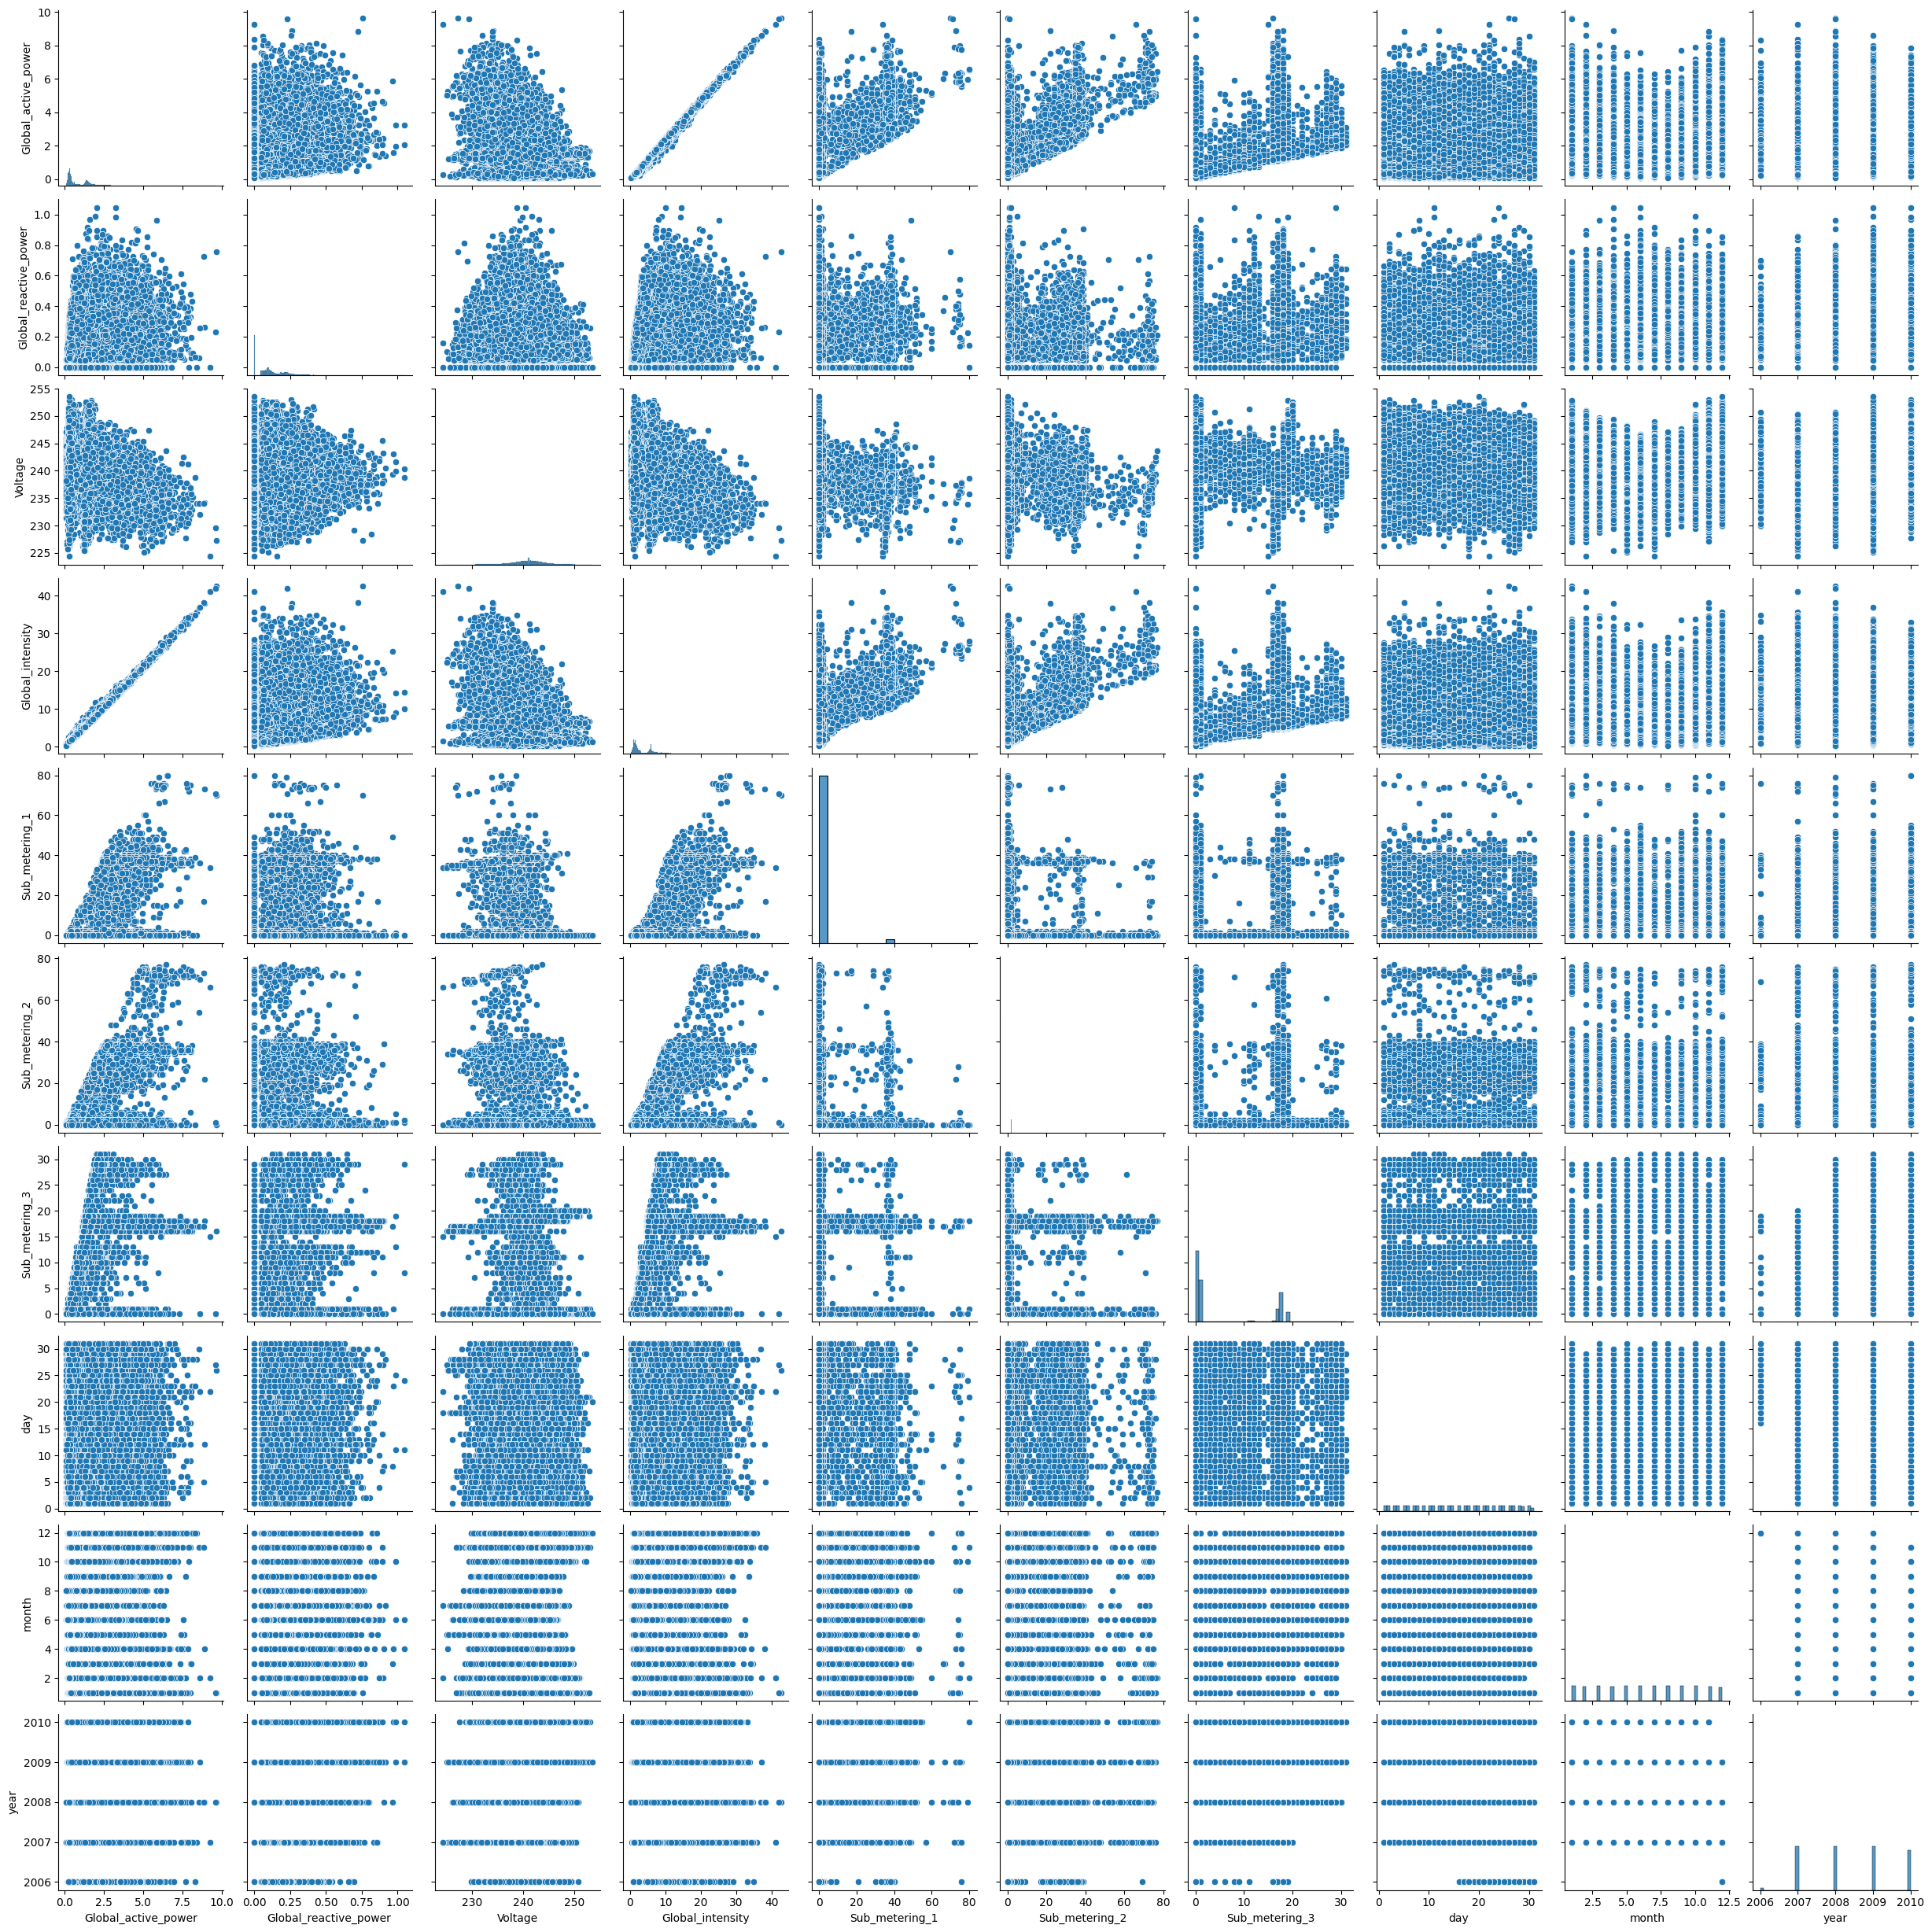

In [27]:
#pairwise relationship across the whole dataset
sns.pairplot(df)

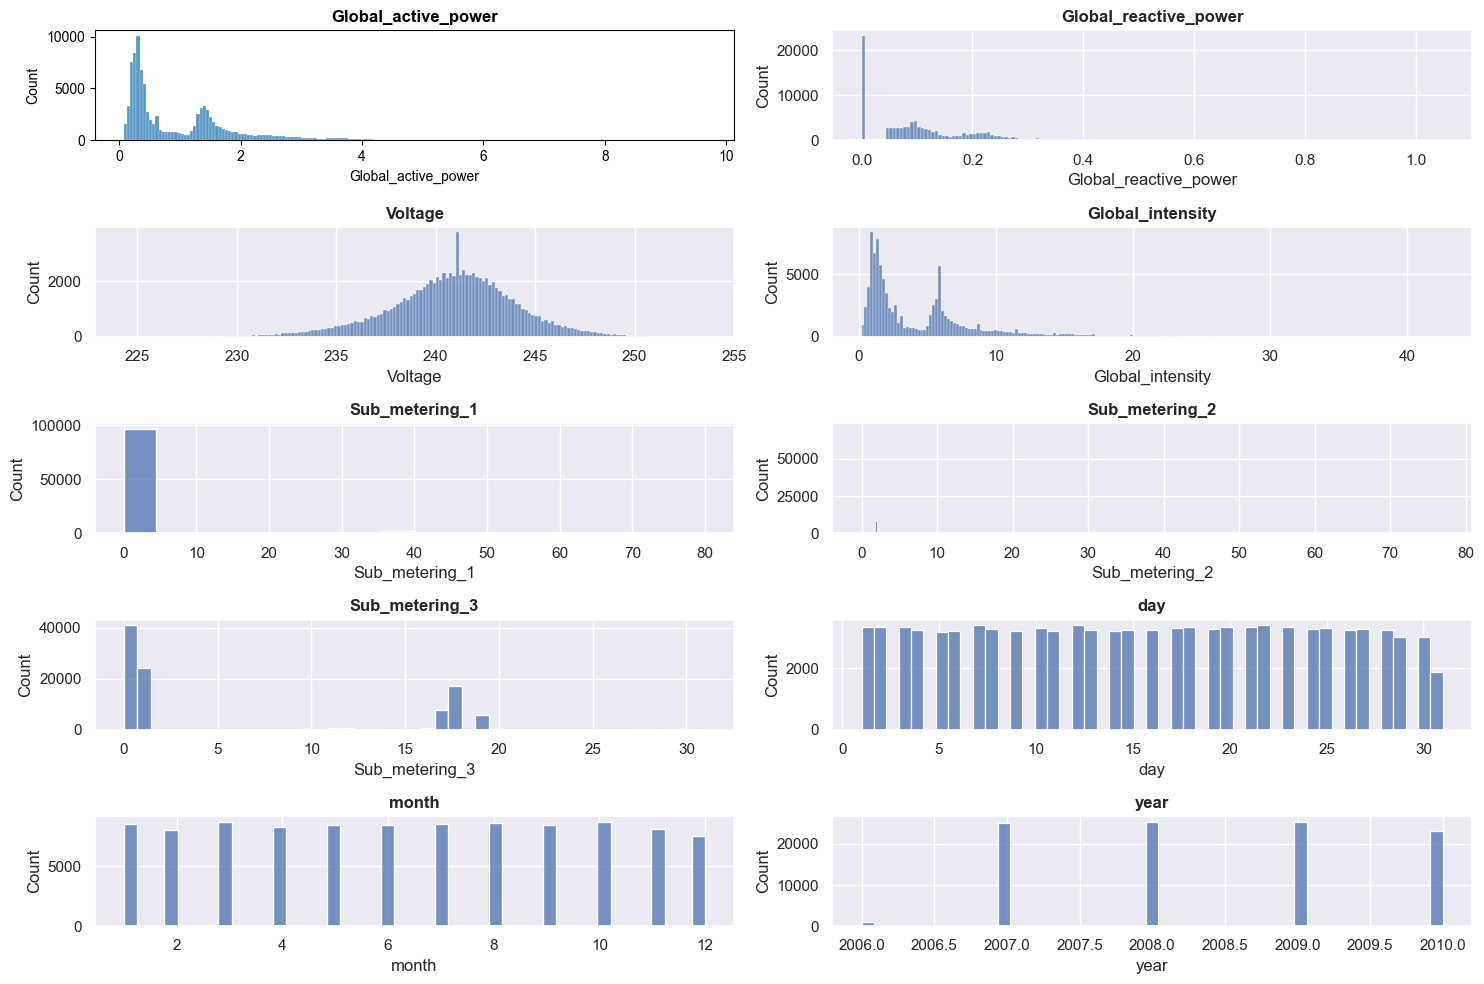

In [28]:
#unvariate analysis

# distribution of Numerical variables

### Checking outliers in numerical features

plt.figure(figsize=(15,10))
for i in enumerate(numerical_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.histplot(data=df, x=i[1], palette ='rainbow')
    plt.title("{}".format(i[1]), fontweight="bold")
    plt.tight_layout()
    plt.show

<Axes: >

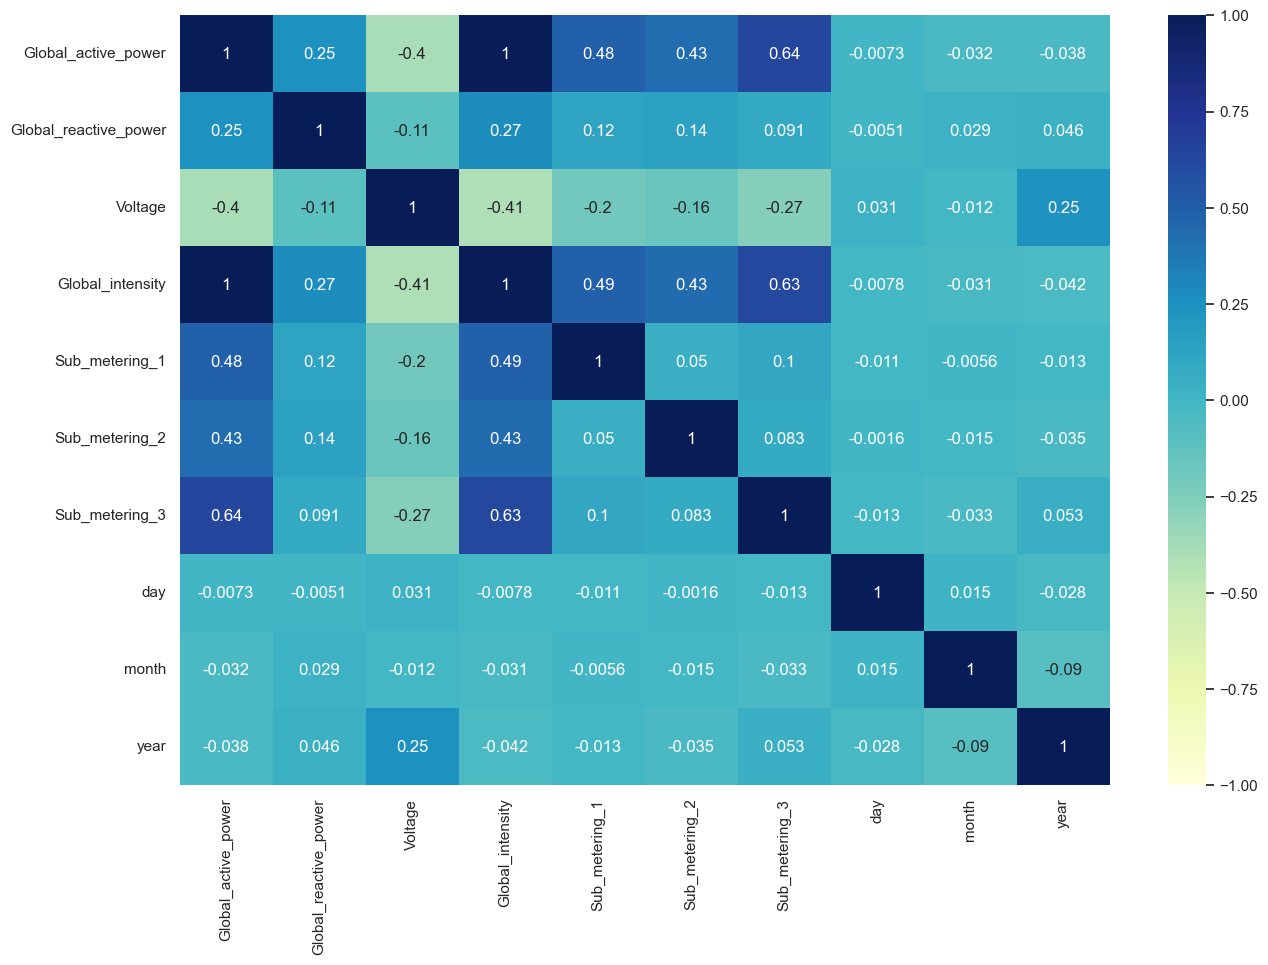

In [29]:
# correlation
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

## Creating Dependent Variable

In [30]:
### Creating target feature as Total_power_use which is sum of Sub_metering_1,2 and 3
df['Total_power_use']=df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']
df.head()

Global_active_power  Global_reactive_power  Voltage  \
1679622                0.250                  0.000   244.03   
1179475                2.424                  0.198   238.00   
890474                 0.160                  0.138   239.84   
437614                 3.720                  0.420   236.97   
1859963                1.368                  0.194   238.46   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
1679622               1.0               0               0               0   
1179475              10.2               0               1              18   
890474                0.8               0               1               0   
437614               15.8               0              37              17   
1859963               5.8               0               1              18   

         day  month  year  Total_power_use  
1679622   25      2  2010                0  
1179475   14      3  2009               19  
890474    26      8  2008                1  
437614    16     10  2007               54  
1859963   30      6  2010               19

In [31]:
df['Total_power_use'].values

array([ 0, 19,  1, ...,  1, 19,  1])

<Axes: >

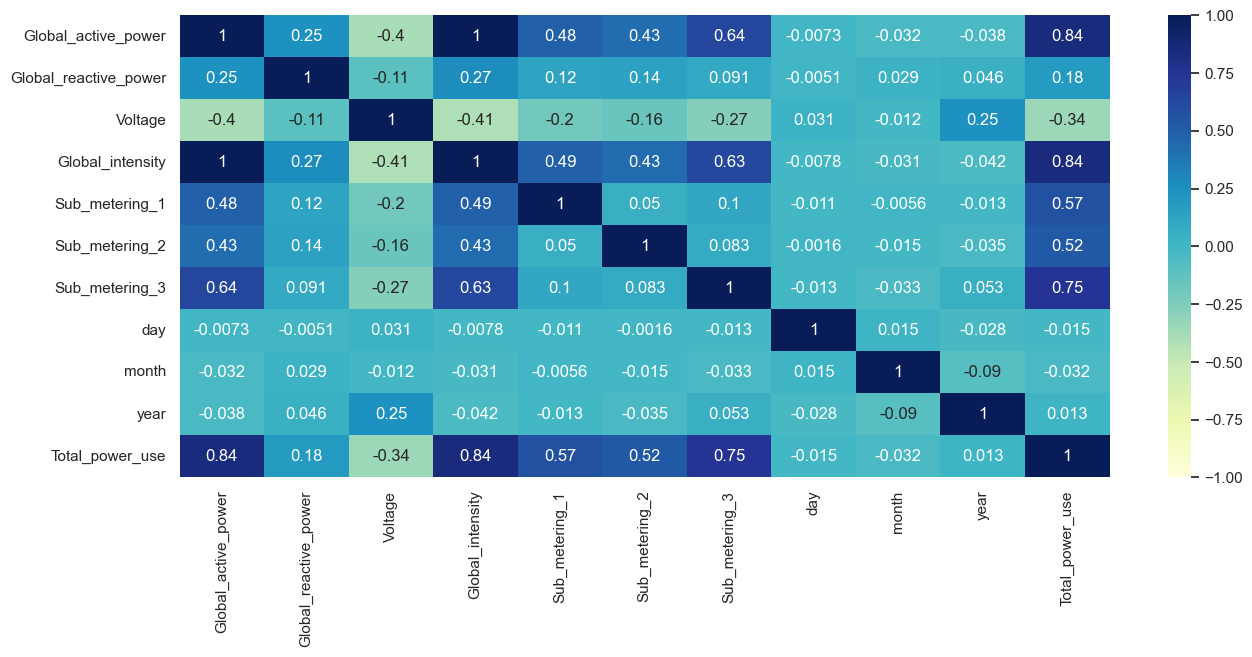

In [32]:
# correlation
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,6)})
sns.heatmap(df.corr(), annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

# Data Visualization

<Axes: xlabel='year', ylabel='Total_power_use'>

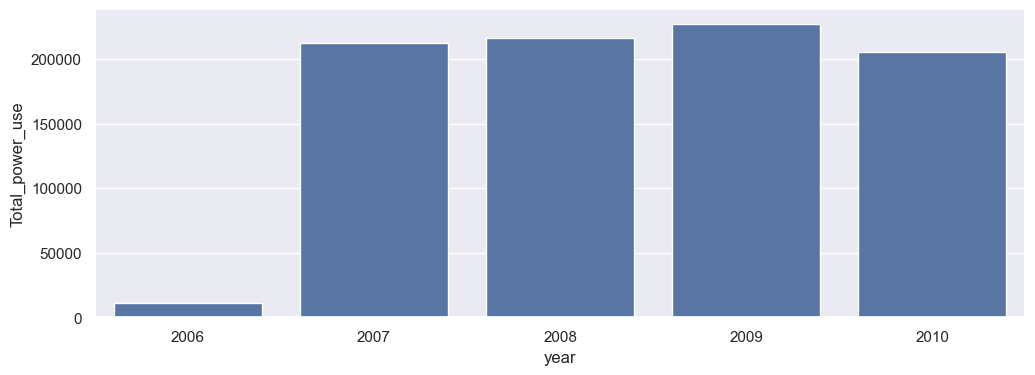

In [33]:
#Visualizing the data for every year
plt.figure(figsize=(12,4))
year = df.groupby('year').sum().reset_index()  #sum() gives the sum of global_active_power for an Year
sns.barplot(x='year',y='Total_power_use',data = year)

<Axes: xlabel='month', ylabel='Global_active_power'>

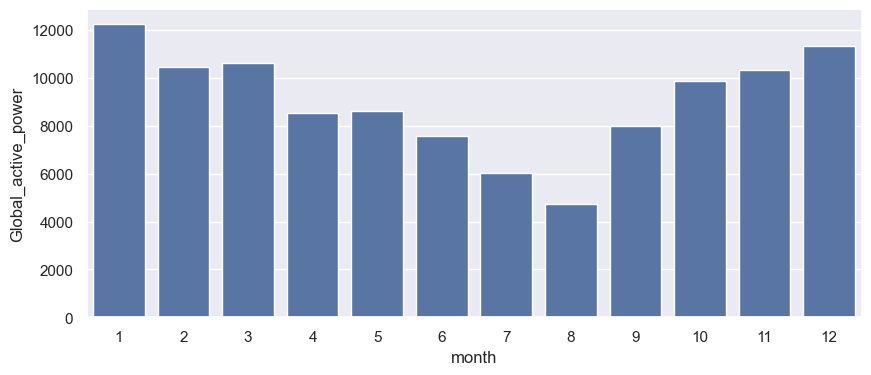

In [34]:
#Visualizing the data for every Month
plt.figure(figsize=(10,4))
month= df.groupby('month').sum().reset_index()
sns.barplot(x='month',y='Global_active_power',data = month)

In [ ]:
plt.figure(figsize=(10,4))
plt.figure(df.groupby(month).quartile
month= df.groupby('month').sum().reset_index()
sns.histplot(x='month',y='Global_active_power',data = month)



<Axes: xlabel='day', ylabel='Global_active_power'>

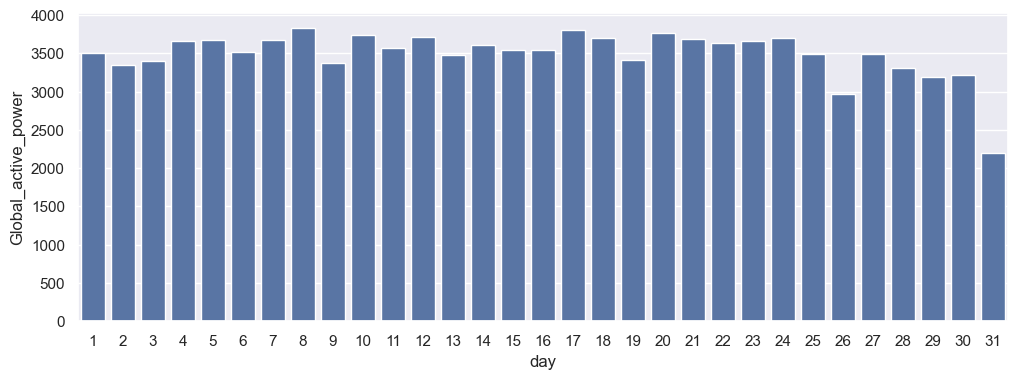

In [35]:
#Visualizing the data for every Data
plt.figure(figsize=(12,4))
day = df.groupby('day').sum().reset_index()  #sum() gives the sum of global_active_power for an day
sns.barplot(x='day',y='Global_active_power',data = day)

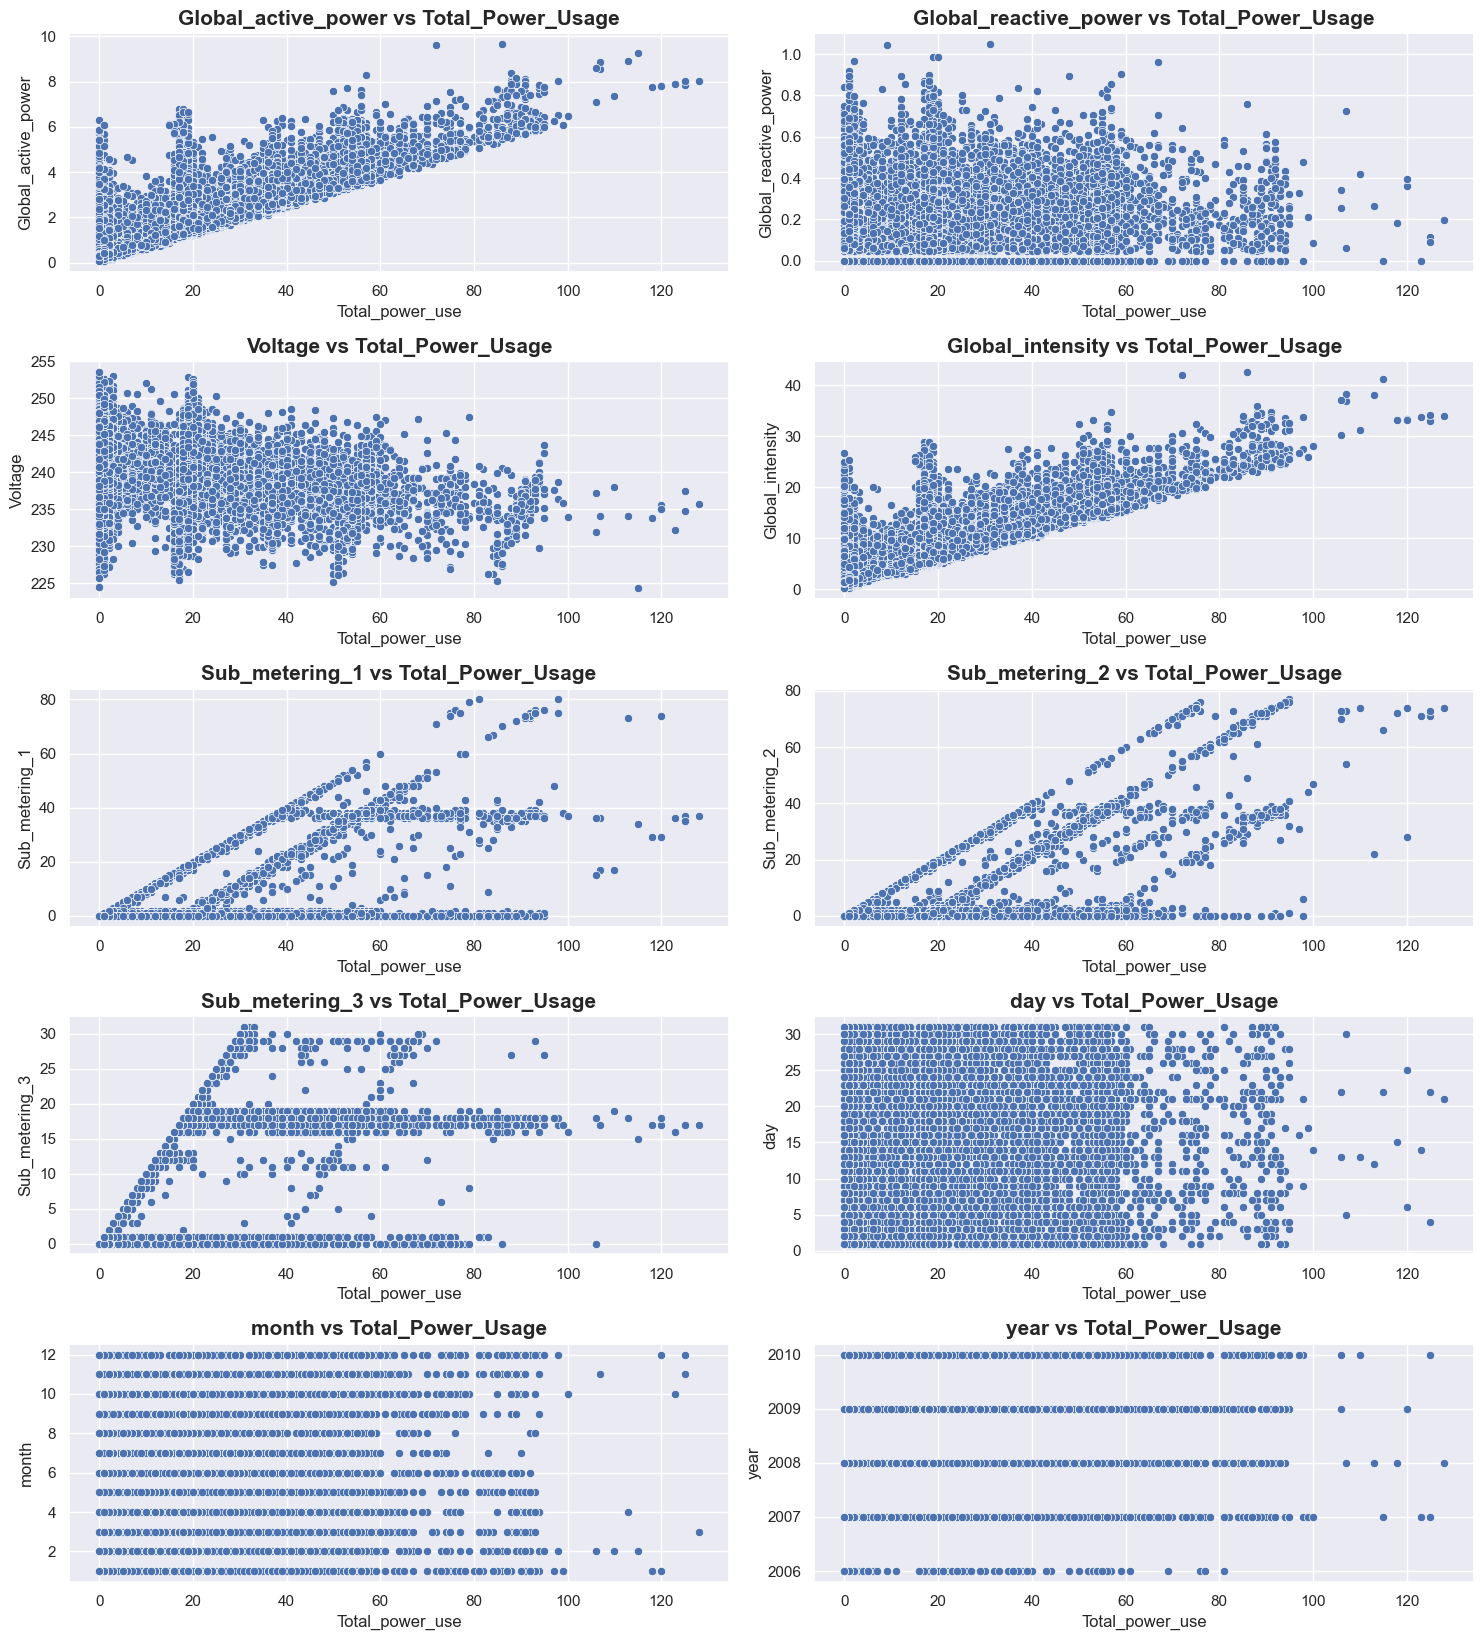

In [36]:
# Comparing Numerical features with Dependent feature

plt.figure(figsize=(15,18))
for i in enumerate([feature for feature in numerical_features if feature not in ['Total_power_use']]):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,8)})
    sns.scatterplot(data=df, y=i[1], x='Total_power_use')
    plt.title("{} vs Total_Power_Usage".format(i[1]),fontsize=15, fontweight="bold")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

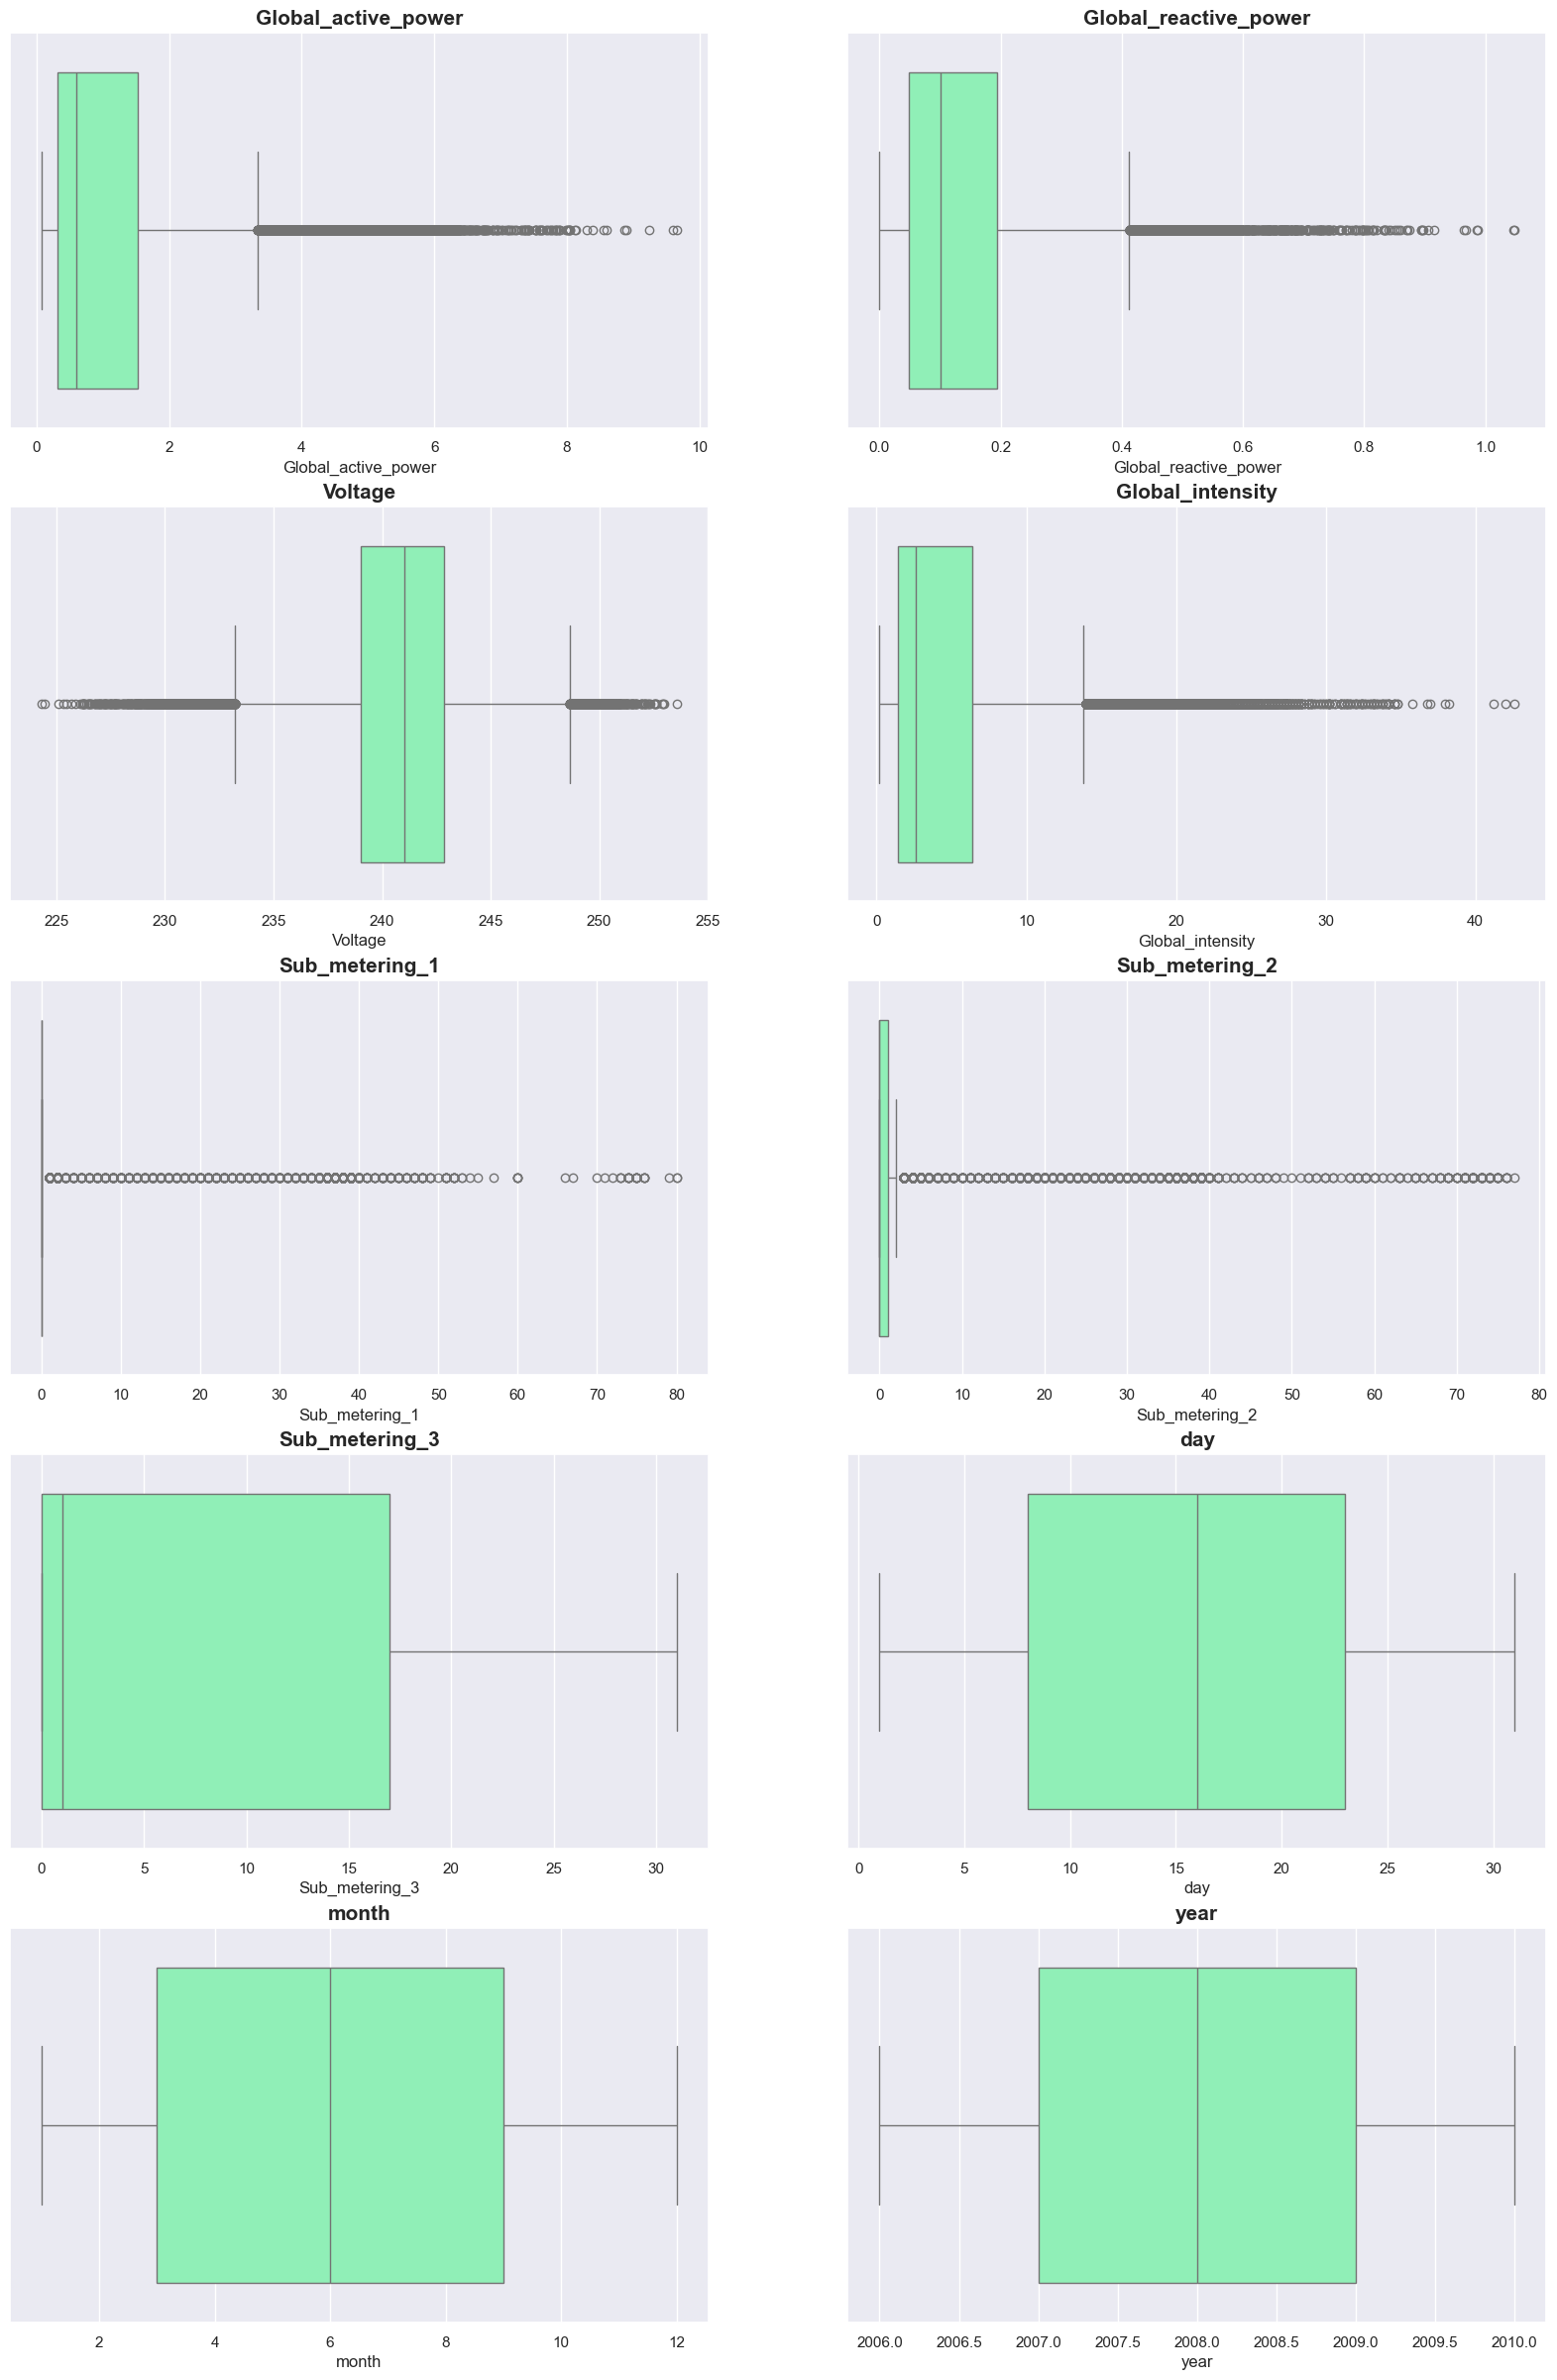

In [37]:
# #outliers

### Checking outliers in numerical features
plt.figure(figsize=(20,30))
for feature in enumerate(numerical_features):
    plt.subplot(5, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, x=feature[1], palette = 'rainbow')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

In [38]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit    
    return in_data

In [39]:
### Capping outliers from numerical features
for feature in numerical_features:
    
    dataset=remove_outliers(df, feature)

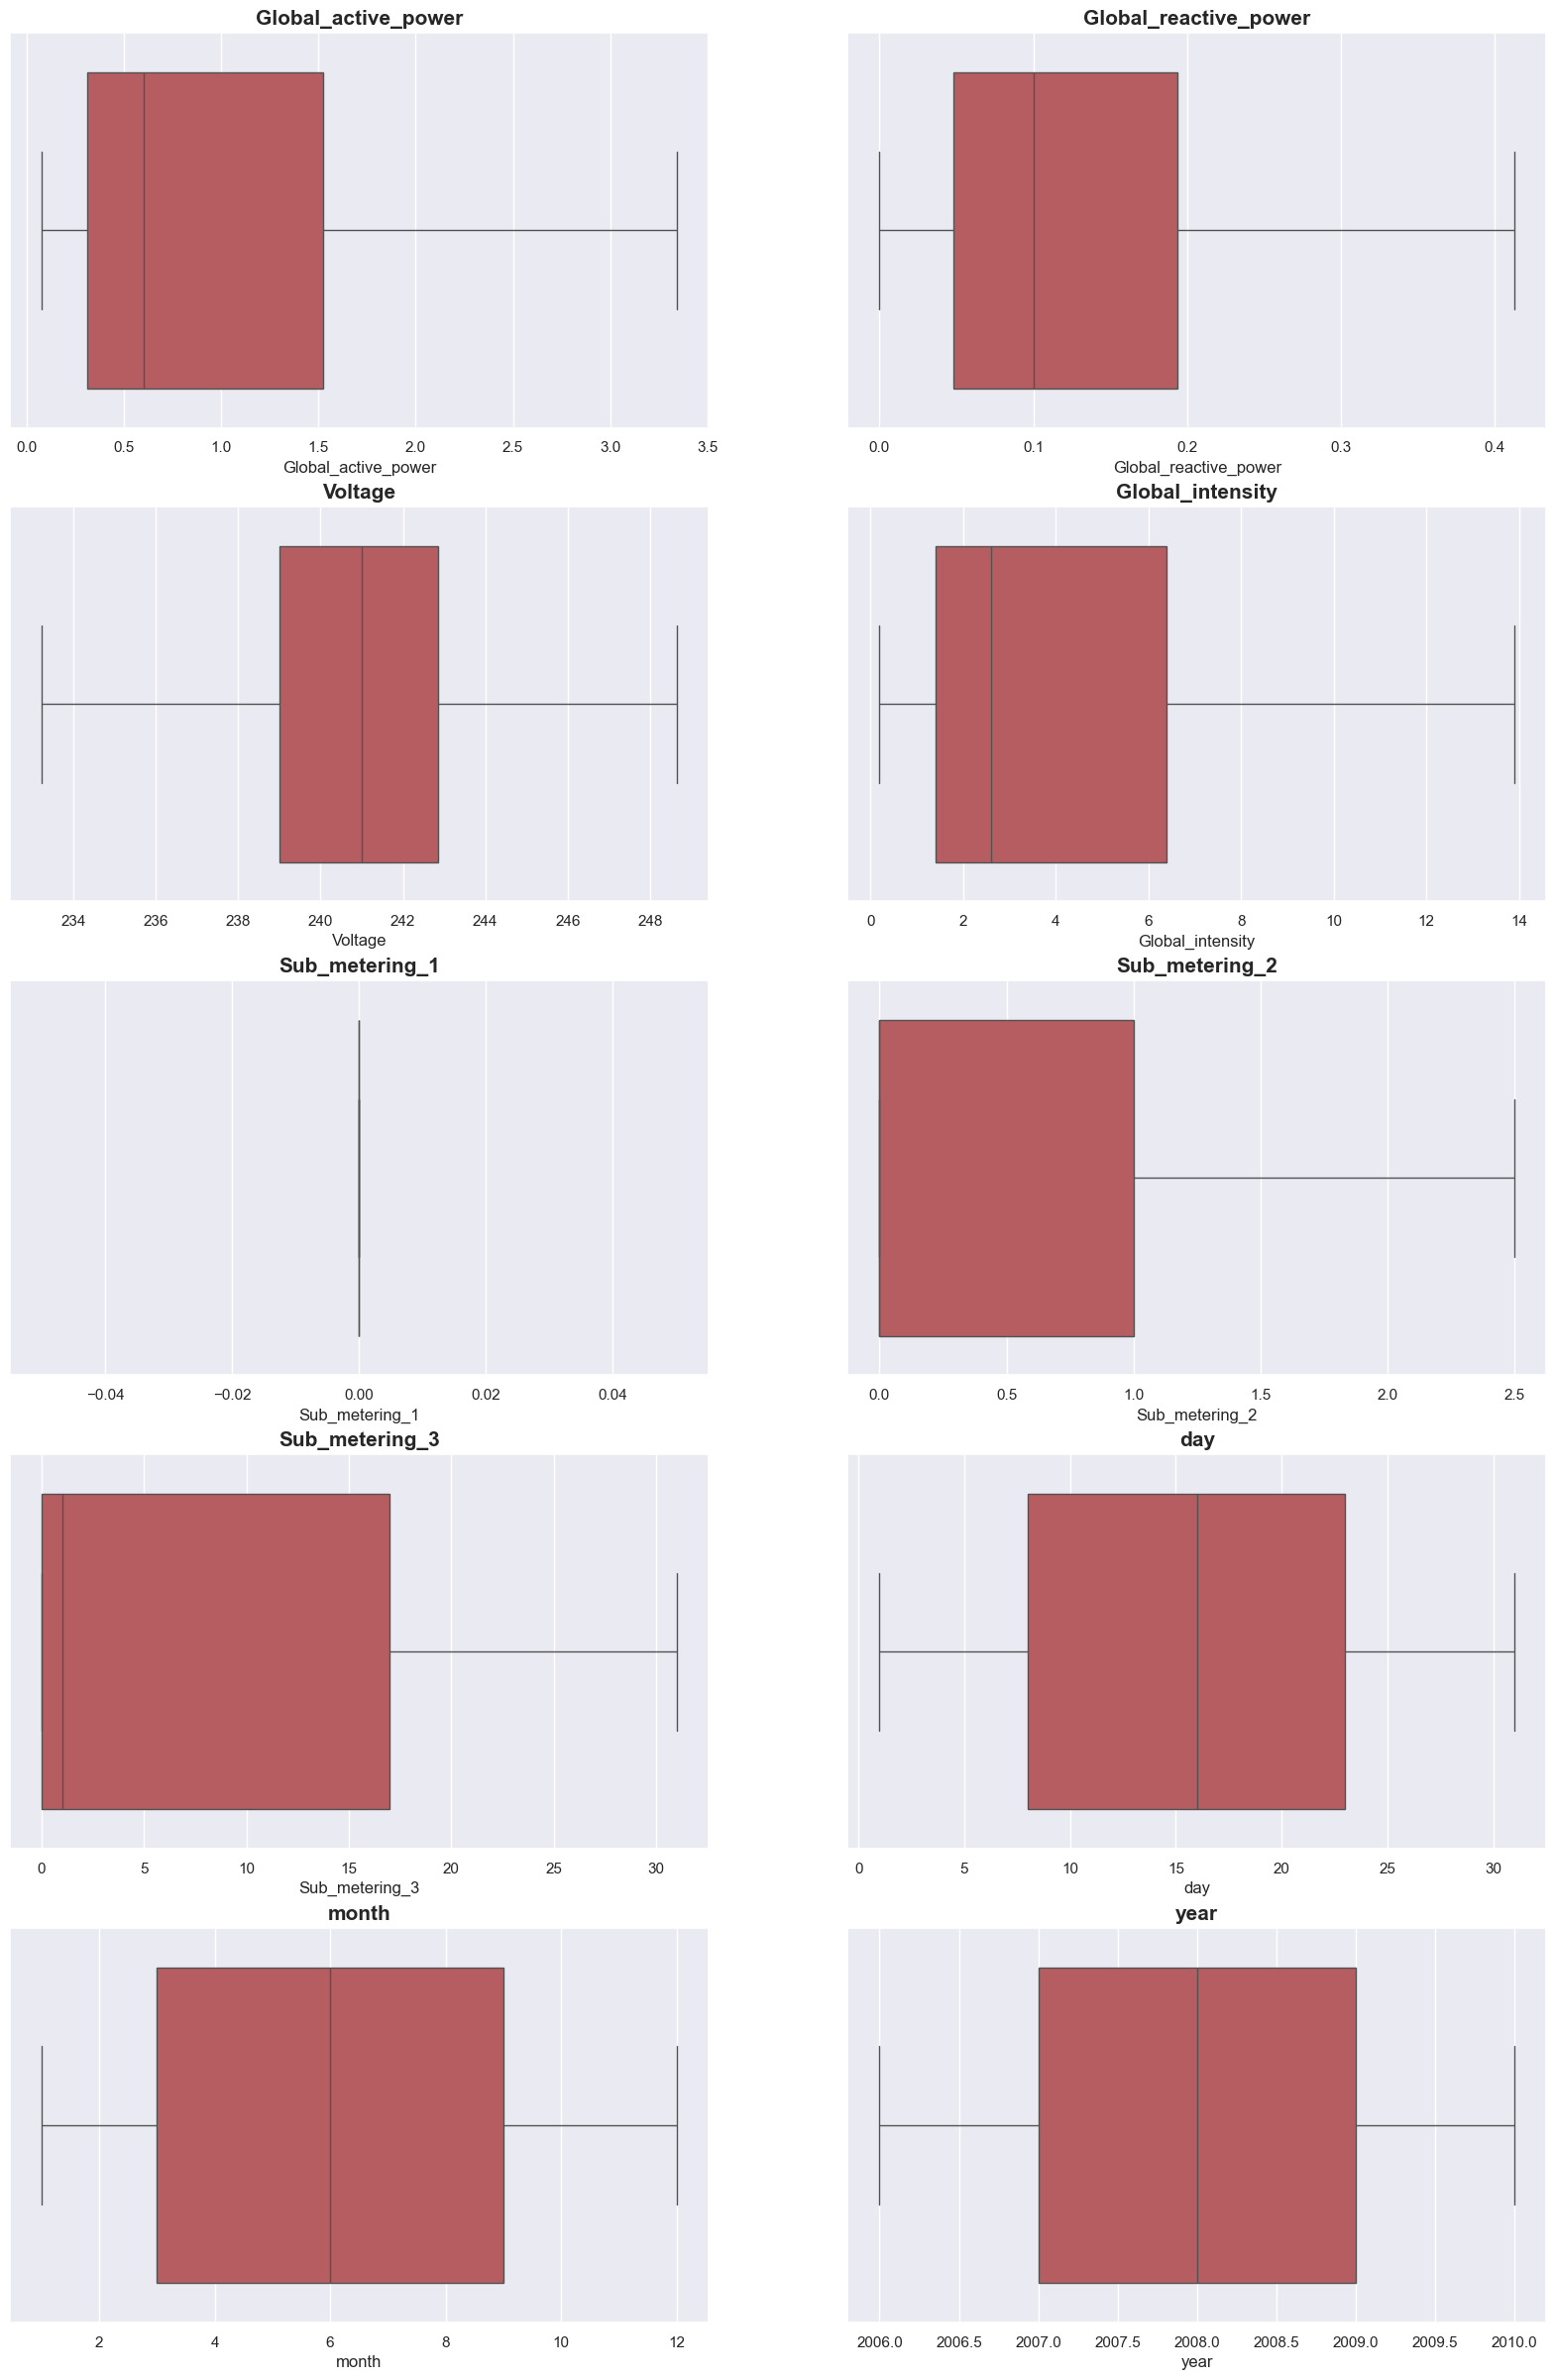

In [40]:

### Checking outliers in numerical features after capping

plt.figure(figsize=(20,30))
for feature in enumerate(numerical_features):
    plt.subplot(5, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, x=feature[1], color='r')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

# Splitting data into Train and Test

In [41]:
X=df.drop('Total_power_use',axis=1)
y=df['Total_power_use']

In [42]:
### Importing required liabraries
from sklearn.model_selection import train_test_split

## Spliting data into train and test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=101)

In [43]:
X_train.head()

Global_active_power  Global_reactive_power  Voltage  \
1029860                3.340                  0.000   237.59   
1440989                1.376                  0.118   241.30   
1108981                2.484                  0.080   243.63   
1522695                0.396                  0.222   245.36   
78659                  1.492                  0.246   240.48   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
1029860              13.9               0             1.0            17.0   
1440989               5.6               0             0.0            19.0   
1108981              10.2               0             0.0            18.0   
1522695               1.8               0             0.0             1.0   
78659                 6.2               0             1.0            17.0   

          day  month  year  
1029860  30.0     11  2008  
1440989  12.0      9  2009  
1108981  24.0      1  2009  
1522695   8.0     11  2009  
78659     9.0      2  2007

In [44]:
y_train.head()

1029860    56
1440989    20
1108981    18
1522695     1
78659      18
Name: Total_power_use, dtype: int64

In [45]:
X_test.head()

Global_active_power  Global_reactive_power  Voltage  \
2030990                0.358                  0.110   247.27   
1487045                1.334                  0.000   238.21   
1512487                0.220                  0.000   242.46   
20803                  0.216                  0.000   244.88   
2036742                2.070                  0.074   243.70   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
2030990               1.4               0             0.0             1.0   
1487045               5.6               0             0.0            18.0   
1512487               0.8               0             0.0             0.0   
20803                 1.0               0             0.0             0.0   
2036742               8.4               0             0.0             1.0   

          day  month  year  
2030990  27.0     10  2010  
1487045  14.0     10  2009  
1512487   1.0     11  2009  
20803    31.0     12  2006  
2036742  31.0     10  2010

In [46]:
y_test.head()

2030990     1
1487045    20
1512487     0
20803       0
2036742     1
Name: Total_power_use, dtype: int64

In [47]:
X_train.shape, y_train.shape

((67000, 10), (67000,))

In [48]:
X_test.shape, y_test.shape

((33000, 10), (33000,))

## Data Preprocessing

In [49]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [50]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 2.53259845, -1.15390641, -1.05552806, ...,  1.62317766,
         1.32777894, -0.3933479 ],
       [ 0.36843772, -0.04060997,  0.13996443, ..., -0.42268423,
         0.74280814,  0.49379349],
       [ 1.58935936, -0.39912916,  0.89077239, ...,  0.9412237 ,
        -1.59707505,  0.49379349],
       ...,
       [-0.7400886 ,  0.90286158, -0.2982754 , ..., -1.21829718,
         0.15783734, -0.3933479 ],
       [-0.7775537 , -0.07834884,  1.87681202, ...,  0.60024672,
        -1.59707505,  1.38093488],
       [-0.88994901, -0.41799859, -0.56250824, ...,  1.28220068,
        -0.13464805,  1.38093488]])

In [51]:
X_test=scaler.transform(X_test)
X_test

array([[-0.75331157, -0.1160877 ,  2.06370842, ...,  1.28220068,
         1.03529354,  1.38093488],
       [ 0.3221573 , -1.15390641, -0.85574225, ..., -0.19536624,
         1.03529354,  0.49379349],
       [-0.90537582, -1.15390641,  0.51375724, ..., -1.67293315,
         1.32777894,  0.49379349],
       ...,
       [ 1.33371511,  0.61982012, -1.73544427, ...,  0.9412237 ,
        -0.42713345, -1.28048929],
       [ 0.27587688, -0.26704315, -0.82029638, ..., -0.8773202 ,
         0.74280814, -0.3933479 ],
       [ 1.23895044, -0.17269599, -0.28216364, ..., -1.10463819,
         1.03529354, -0.3933479 ]])

# Model Training and Evaluation

Multiple machine learning models were trained and compared:
- *Linear Regression – A simple baseline model.*
- *Decision Tree Regression – Captures non-linear patterns but may overfit.*
- *Random Forest Regression – An ensemble model that improves accuracy.*
- *XG Boost – Provides better performance through boosting techniques.*
- *kNN - KNN is a supervised machine learning algorithm used for both classification and regression tasks.*

## Model 1: Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions_linear = lm.predict(X_test)
y_train_predictions_linear=lm.predict(X_train)

In [53]:
from sklearn import metrics 
print('Results of Linear Regression Testing:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions_linear))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predictions_linear))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,predictions_linear)))
print('R2:',metrics.r2_score(y_test,predictions_linear))
print('\n')
print('Results of Linear Regression Training:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_train,y_train_predictions_linear))
print('Mean Squared Error:',metrics.mean_squared_error(y_train,y_train_predictions_linear))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train,y_train_predictions_linear)))
print('R2:',metrics.r2_score(y_train,y_train_predictions_linear))



Results of Linear Regression Testing:

Mean Absolute Error: 3.5581255853304126
Mean Squared Error: 41.27016672086353
Root Mean Squared Error: 6.4241860745827974
R2: 0.7470544941795552


Results of Linear Regression Training:

Mean Absolute Error: 3.514913622202811
Mean Squared Error: 40.10342105206161
Root Mean Squared Error: 6.332726194306968
R2: 0.7510870867088726


## MODEL 2: Decision Tree Regression


In [54]:
## Importing required liabraries
from sklearn.tree import DecisionTreeRegressor

## Create instance
dtr = DecisionTreeRegressor()

## fit the model
dtr.fit(X_train,y_train)

## Predict
y_pred_dtr = dtr.predict(X_test)
y_train_y_pred_dtr=dtr.predict(X_train)

In [55]:
from sklearn import metrics 
print('Results of Decision Tree Regression Testing:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_dtr))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_dtr))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtr)))
print('R2:',metrics.r2_score(y_test,y_pred_dtr))
print('\n')
print('Results of Decision Tree Regression Training:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_train,y_train_y_pred_dtr))
print('Mean Squared Error:',metrics.mean_squared_error(y_train,y_train_y_pred_dtr))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train,y_train_y_pred_dtr)))
print('R2:',metrics.r2_score(y_train,y_train_y_pred_dtr))



Results of Decision Tree Regression Testing:

Mean Absolute Error: 1.1633333333333333
Mean Squared Error: 32.848439393939394
Root Mean Squared Error: 5.731355807654887
R2: 0.7986713944212926


Results of Decision Tree Regression Training:

Mean Absolute Error: 0.0007014925373134329
Mean Squared Error: 0.009395522388059702
Root Mean Squared Error: 0.09693050287736932
R2: 0.99994168410604


###  Techniques to control  overfitting and improving model complexity By Limiting the Number of Leaves:

In [56]:
# Limiting the Number of Leaves:

#creating instance of a class

dtf = DecisionTreeRegressor(max_leaf_nodes=20)

#fitting the model

dtf.fit(X_train, y_train)

#predicting

ypred =  dtf.predict(X_test)

#accuracy of training and testing

print('Training Accuracy:', dtf.score(X_train, y_train))

print('Testing Accuracy:',dtf.score(X_test,y_test))

Training Accuracy: 0.8699776557037511
Testing Accuracy: 0.8644668792156709


## Model 3: Random Forest Regression


In [57]:
## Importing required liabraries
from sklearn.ensemble import RandomForestRegressor

## Create instance
rfr = RandomForestRegressor()

## fit the model
rfr.fit(X_train,y_train)

## Predict
y_pred_rfr = rfr.predict(X_test)
y_train_y_pred_rfr = rfr.predict(X_train)


In [58]:
from sklearn import metrics 
print('Results of Random Forest Regression Testing:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_rfr))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_rfr))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rfr)))
print('R2:',metrics.r2_score(y_test,y_pred_rfr))
print('\n')
print('Results of Random Forest Regression Training:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_train,y_train_y_pred_rfr))
print('Mean Squared Error:',metrics.mean_squared_error(y_train,y_train_y_pred_rfr))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train,y_train_y_pred_rfr)))
print('R2:',metrics.r2_score(y_train,y_train_y_pred_rfr))


Results of Random Forest Regression Testing:

Mean Absolute Error: 1.0519677676767676
Mean Squared Error: 17.790264568907407
Root Mean Squared Error: 4.2178507049097185
R2: 0.8909631865434909


Results of Random Forest Regression Training:

Mean Absolute Error: 0.3892554751243782
Mean Squared Error: 2.489410947067376
Root Mean Squared Error: 1.5777867242017776
R2: 0.984548786239235


### Techniques to control overfitting and improving model complexity By Limiting the Number of Leaves:

In [59]:

#creating instance of a class

rfr = RandomForestRegressor(max_leaf_nodes=20)

#fitting the model

rfr.fit(X_train, y_train)

#predicting

ypred =  rfr.predict(X_test)

#accuracy of training and testing

print('Training Accuracy:', rfr.score(X_train, y_train))

print('Testing Accuracy:',rfr.score(X_test,y_test))

Training Accuracy: 0.876206359761382
Testing Accuracy: 0.8717766656654682


## Model 4: XG Boosting Regression

In [60]:
## Importing required liabraries
from xgboost import XGBRegressor

## Create instance
xgbr = XGBRegressor()

## fit the model
xgbr.fit(X_train,y_train)

## Predict
y_pred_xgbr = xgbr.predict(X_test)
y_train_y_pred_xgbr = xgbr.predict(X_train)

In [61]:
from sklearn import metrics
print('Results of XGBRegressor Testing:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_xgbr))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_xgbr))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgbr)))
print('R2:',metrics.r2_score(y_test,y_pred_xgbr))
print('\n')
print('Results of XGBRegressor Training:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_train,y_train_y_pred_xgbr))
print('Mean Squared Error:',metrics.mean_squared_error(y_train,y_train_y_pred_xgbr))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train,y_train_y_pred_xgbr)))
print('R2:',metrics.r2_score(y_train,y_train_y_pred_xgbr))

Results of XGBRegressor Testing:

Mean Absolute Error: 1.1673119068145752
Mean Squared Error: 18.99960708618164
Root Mean Squared Error: 4.358853873001668
R2: 0.8835511207580566


Results of XGBRegressor Training:

Mean Absolute Error: 0.729282021522522
Mean Squared Error: 6.669885635375977
Root Mean Squared Error: 2.5826121728544487
R2: 0.9586015343666077


## Model 5 : KNN

In [62]:
## Importing required liabraries
from sklearn.neighbors import KNeighborsRegressor

## Create instance
knn = KNeighborsRegressor()

## fit the model
knn.fit(X_train,y_train)

## Predict
y_pred_knn = knn.predict(X_test)
y_train_y_pred_knn = knn.predict(X_train)


In [63]:
from sklearn import metrics
print('Results of KNN Testing:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_knn))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_knn))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_knn)))
print('R2:',metrics.r2_score(y_test,y_pred_knn))
print('\n')
print('Results of KNN Training:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_train,y_train_y_pred_knn))
print('Mean Squared Error:',metrics.mean_squared_error(y_train,y_train_y_pred_knn))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train,y_train_y_pred_knn)))
print('R2:',metrics.r2_score(y_train,y_train_y_pred_knn))


Results of KNN Testing:

Mean Absolute Error: 1.5411272727272727
Mean Squared Error: 25.159500606060607
Root Mean Squared Error: 5.01592470099588
R2: 0.8457970220950775


Results of KNN Training:

Mean Absolute Error: 1.2222328358208956
Mean Squared Error: 16.382499104477613
Root Mean Squared Error: 4.0475300004419505
R2: 0.8983175132667347


## Analysis From Model Evaluation

## Decision Tree

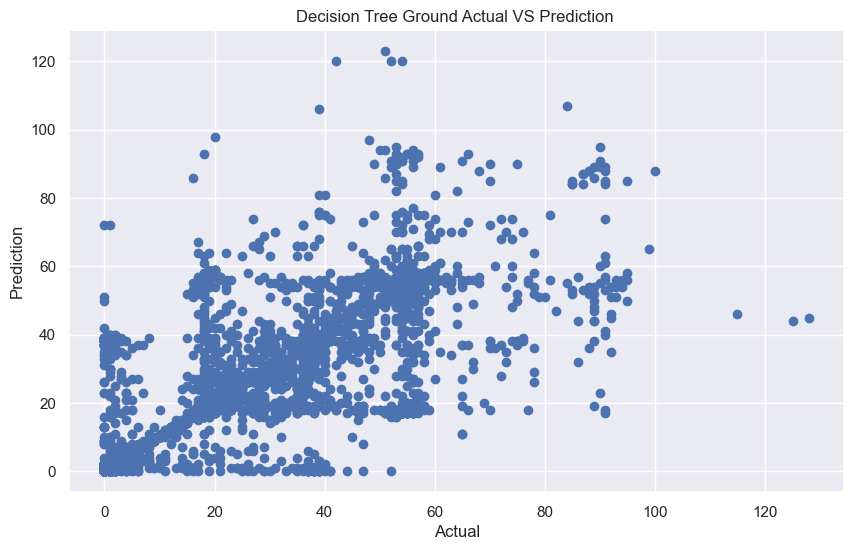

In [64]:
plt.scatter(y_test,y_pred_dtr)
plt.title("Decision Tree Ground Actual VS Prediction ")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

## Random Forest Regression

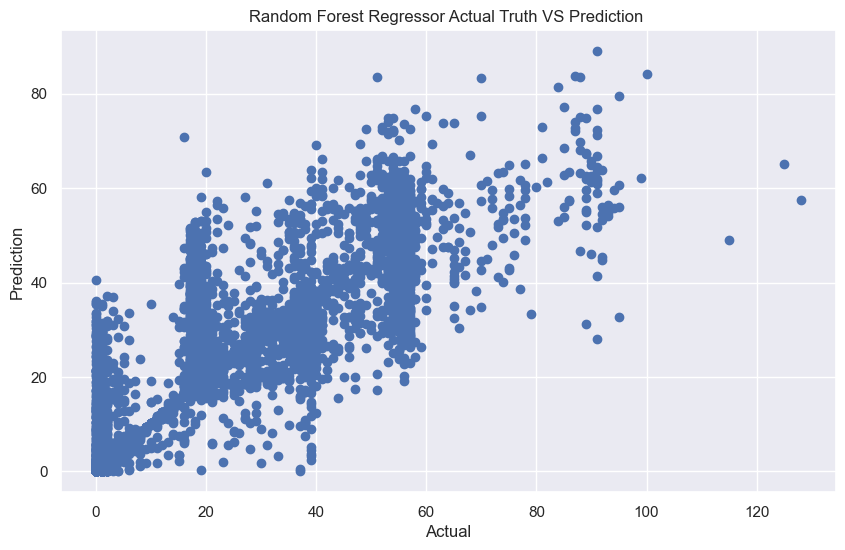

In [65]:
plt.scatter(y_test,y_pred_rfr)
plt.title("Random Forest Regressor Actual Truth VS Prediction ")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

## XGB Regression

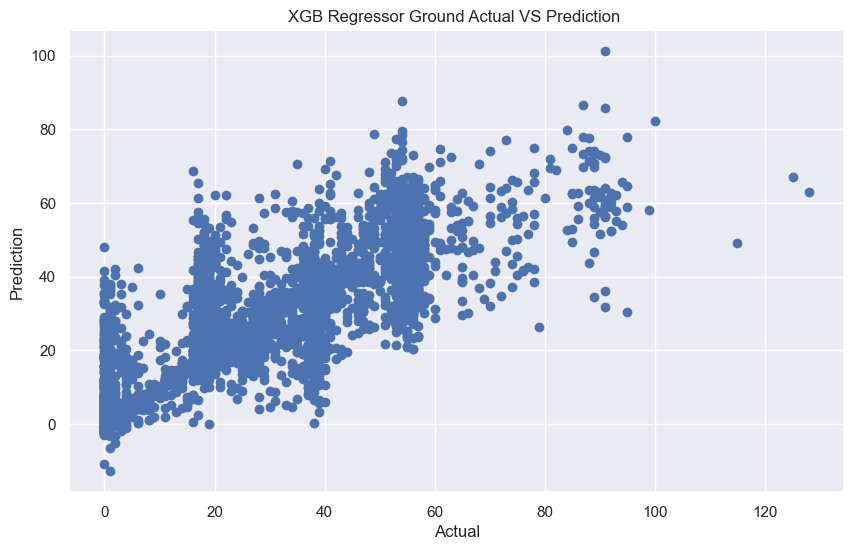

In [66]:
plt.scatter(y_test,y_pred_xgbr)
plt.title("XGB Regressor Ground Actual VS Prediction ")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

## Findings from Model Evaluation:


- *Random Forest and Gradient Boosting models performed the best with high R² scores.*
- *KNN had the lowest accuracy, indicating that Household Power Consumption follow non-linear patterns.*

## Conclusion:


- *The project successfully predicted Household Power Consumption based on electrical quantities and some sub-metering values are available.
Month ,Year,Day, and Submetering were found to be the most influential factors.*
- *The best-performing model can help several significant benefits, ultimately leading to better management and optimization of energy usage.*
- *It can provide tailored recommendations to individual households on how to reduce their energy consumption based on their specific usage patterns.*